### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). A parte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [18]:
X = np.array(lista_alumnos)[:, 1].astype(np.float64).reshape(-1,1)
y = np.array(lista_alumnos)[:, 2].astype(np.float64).reshape(-1,1)
y

array([[1.8 ],
       [1.8 ],
       [1.65],
       [1.73],
       [1.73],
       [1.75],
       [1.64],
       [1.6 ],
       [1.7 ],
       [1.68],
       [1.6 ],
       [1.69],
       [1.6 ],
       [1.75]])

In [22]:
edad = [e[1] for e in lista_alumnos]
altura = [e[2] for e in lista_alumnos]

In [23]:
X = np.array(edad).reshape(-1,1)
y = np.array(altura).reshape(-1,1)

In [24]:
X

array([[47],
       [31],
       [39],
       [29],
       [47],
       [24],
       [34],
       [36],
       [46],
       [29],
       [40],
       [47],
       [38],
       [51]])

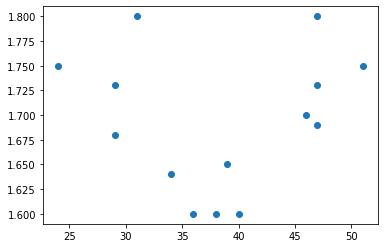

In [19]:
plt.scatter(X, y);

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)
print(model.intercept_ , model.coef_)

[1.67284591] [[0.0006761]]


Text(0.5, 0, 'age')

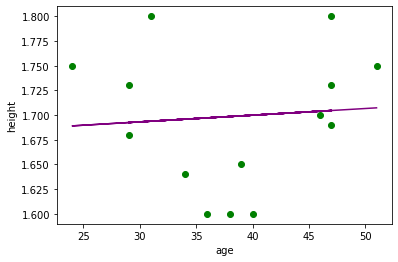

In [23]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel("height")
plt.xlabel("age")

**¿Es una buena técnica para este tipo de problemas? ¿Por qué?**

No porque como se puede observar en el gráfico, los datos no se distribuyen de forma linear y por tanto el modelo linear no se ajusta a los datos.

**¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?**

In [30]:
dict_edad_altura = {"edad": edad , "altura": altura, "prediction":[e for lista in model.predict(X).tolist() for e in lista]}
df_edad_altura = pd.DataFrame(dict_edad_altura)
df_edad_altura["error"] = df_edad_altura["altura"] - df_edad_altura["prediction"]

In [28]:
model.predict(X) - y

array([[-0.09537736],
       [-0.10619497],
       [ 0.04921384],
       [-0.03754717],
       [-0.02537736],
       [-0.06092767],
       [ 0.05583333],
       [ 0.09718553],
       [ 0.00394654],
       [ 0.01245283],
       [ 0.09988994],
       [ 0.01462264],
       [ 0.09853774],
       [-0.04267296]])

In [36]:
df_edad_altura['error'].sum()

0.15079990032394375

In [31]:
df_edad_altura

,edad,altura,prediction,error
0,47,1.80,1.673187,0.126813
1,31,1.80,1.692464,0.107536
2,39,1.65,1.682826,-0.032826
3,29,1.73,1.694874,0.035126
4,47,1.73,1.673187,0.056813
5,24,1.75,1.700898,0.049102
6,34,1.64,1.688850,-0.048850
7,36,1.60,1.686440,-0.086440
8,46,1.70,1.674392,0.025608
9,29,1.68,1.694874,-0.014874


In [32]:
print(f'MSE --> {mean_squared_error(y_test, model.predict(X_test))}\
    \nRMSE --> {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')


MSE --> 0.006795578689385722    
RMSE --> 0.08243530001998975


In [33]:
model.score(X_train, y_train)

0.022217291324172272

**Representa la matriz de correlación, ¿los datos están correlacionados?**

In [34]:
corr_matrix = df_edad_altura[["edad", "altura"]].corr()
corr_matrix

,edad,altura
edad,1.000000,0.061501
altura,0.061501,1.000000


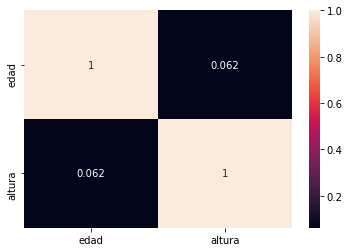

In [35]:
sns.heatmap(corr_matrix, annot = True)